# Análise dos dados do Mosaico

**Higo Thaian Pereira da Silva** [(higo.silva@redes.unb.br)](mailto:higo.silva@redes.unb.br)

**Data: 27/03/2023**

Neste _notebook_ é apresentada uma análise dos dados da plataforma [Mosaico](http://sistemas.anatel.gov.br/se/public/view/b/srd.php) disponibilizados pelo MCOM. Os dados estão dispostos no arquivo `./data/SCR_DADOS_DOCS_HIST_TV_GTVD_RTV_ RTVD_FM_OM_2023_03_03.xlsx`.

## 1.1 Leitura dos Dados

In [4]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from itertools import cycle

pd.set_option('display.max_columns', None) 
# Import data
data_file_path = "./data/SCR_DADOS_DOCS_HIST_TV_GTVD_RTV_ RTVD_FM_OM_2023_03_03.xlsx"
data_frame = pd.read_excel(data_file_path)
data_frame.head(10)

,_id,srd_documento_dim1_idx,documento__id,tname,IdtHistoricoDocumento,IdtPlanoBasico,IdtRazao,NumDocumento,DataDocumento,HoraDocumento,DataDOU,HoraDOU,IdtTipoDocumento,SiglaOrgao,IndNatureza,DataInclusao,HoraInclusao,NumProcesso,CodOrgao,DataAlteracao,HoraAlteracao,dt_geracao,dt_referencia
0,5810ef4cb1b3c,N/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,2023-03-03,2023-03-02
1,5810ef4cb22f9,N/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,2023-03-03,2023-03-02
2,5810ef4cb2adf,N/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,2023-03-03,2023-03-02
3,5810ef4cb32bf,N/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,2023-03-03,2023-03-02
4,5810ef4cb525c,N/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,2023-03-03,2023-03-02
5,5810ef4cb6b33,N/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,2023-03-03,2023-03-02
6,5810ef4d9ad38,N/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,2023-03-03,2023-03-02
7,5810ef4dd66bb,N/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,2023-03-03,2023-03-02
8,5810ef4e4abb6,N/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,2023-03-03,2023-03-02
9,5810ef4e702e8,N/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,2023-03-03,2023-03-02


## 1.2 Análise de campos preenchidos e vazios

Para fins de classificação, três limiares de preenchimento foram definidos: 
1. **Classe A**: percentual de preenchimento acima de 75%;
2. **Classe B**: percentual de preenchimento entre 25% e 75%;
3. **Classe C**: percentual de preenchimento abaixo de 25%.


In [67]:
PERC_TH_A = 75.0
PERC_TH_B = 25.0

empty_percentage_perc = []
filled_percentage_perc = []
for name, values in data_frame.items():
    
    # Calculate the percentage of filled and empty lines in each field
    num_total_rows = len(data_frame[name])
    num_empty_rows = data_frame[name].isna().sum()
    num_filled_rows = num_total_rows - num_empty_rows
    empty_rows_perc = 100.0 * ( num_empty_rows / num_total_rows )
    filled_rows_perc = 100.0 * ( num_filled_rows / num_total_rows )
    
    empty_percentage_perc.append([name,empty_rows_perc])
    filled_percentage_perc.append([name,filled_rows_perc])

filled_percentage_th_a = list(filter(lambda e: e[1] >= PERC_TH_A, filled_percentage_perc))
filled_percentage_th_b = list(filter(lambda e: e[1] >= PERC_TH_B and e[1] < PERC_TH_A, filled_percentage_perc))
filled_percentage_th_c = list(filter(lambda e: e[1] < PERC_TH_B, filled_percentage_perc))

Na **Classe A**, estão contidos os campos:

Campos no Limiar A:
	_id (100.00%)
	srd_documento_dim1_idx (100.00%)
	IdtRazao (79.72%)
	NumDocumento (80.00%)
	DataDocumento (79.96%)
	HoraDocumento (79.96%)
	IdtTipoDocumento (80.75%)
	IndNatureza (79.06%)
	NumProcesso (79.08%)
	CodOrgao (80.52%)
	dt_geracao (100.00%)
	dt_referencia (100.00%)


Text(0.5, 1.0, 'Campos com percentual de preenchimento acima de 75.0%')

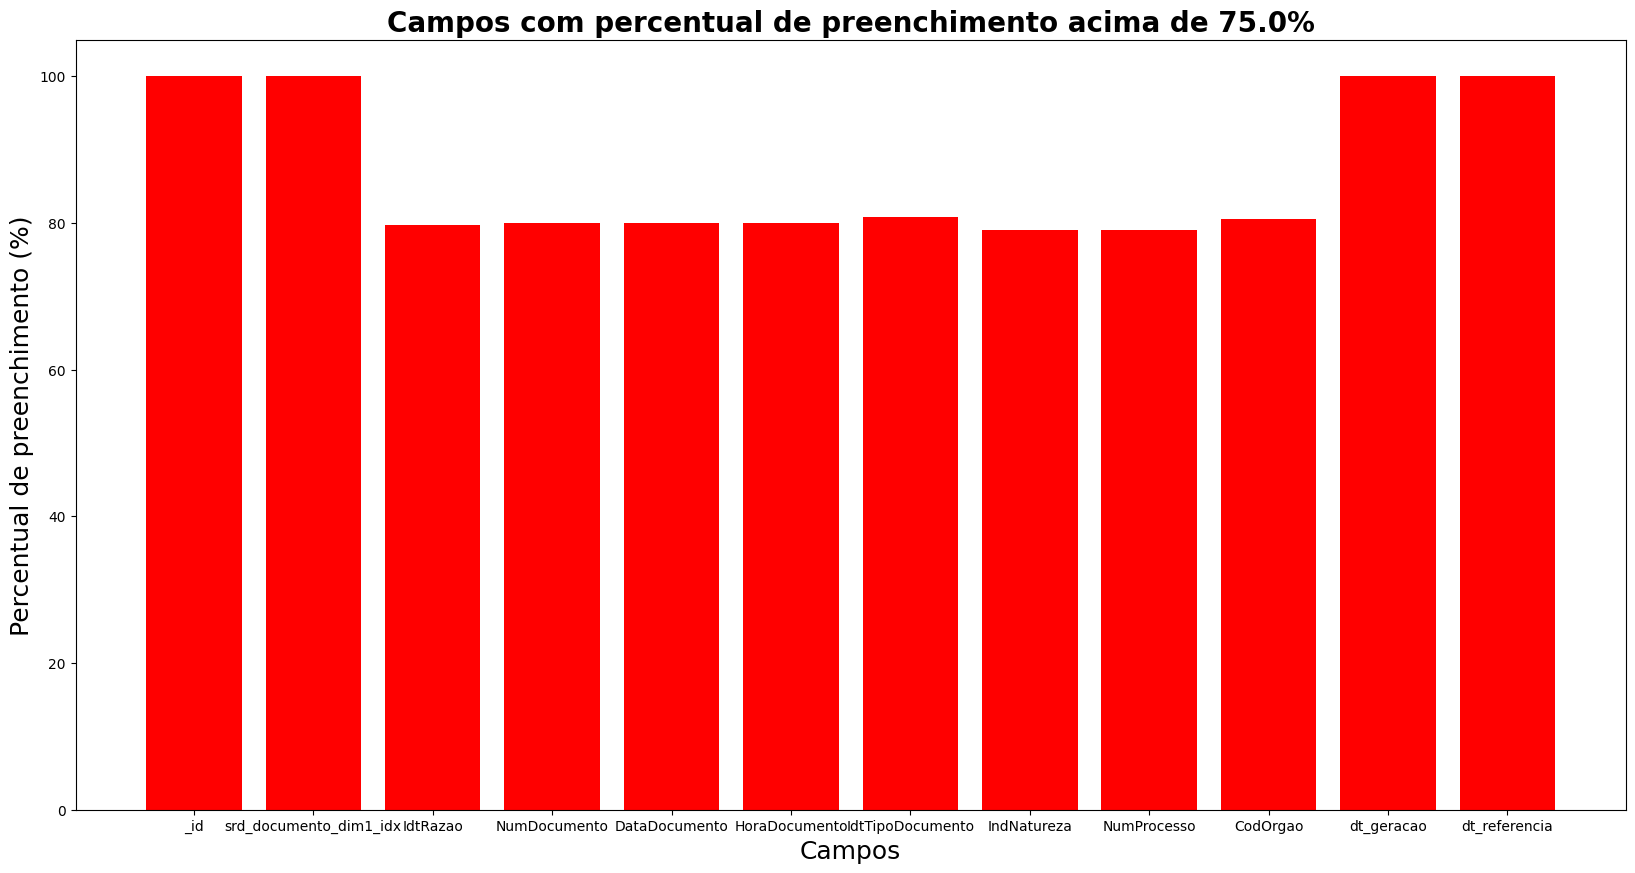

In [63]:
# Fields on threshold A
print('Campos no Limiar A:')
for i in range(len(filled_percentage_th_a)):
    print(f"\t{filled_percentage_th_a[i][0]} ({filled_percentage_th_a[i][1]:.2f}%)")
fig = plt.figure(figsize=(20,10))
values = list(map(lambda x : x[1], filled_percentage_th_a ))
keys = list(map(lambda x : x[0], filled_percentage_th_a ))
plt.bar( range(len(values)), values, tick_label=keys, color='r' )
plt.xlabel('Campos', fontsize = 18)
plt.ylabel('Percentual de preenchimento (%)', fontsize = 18)
plt.title(f'Campos com percentual de preenchimento acima de {PERC_TH_A}%', fontsize = 20, fontweight='bold')

Por sua vez, os seguintes campos são de **Classe B**:


Campos no Limiar B:
	documento__id (29.65%)
	tname (29.65%)
	IdtHistoricoDocumento (29.65%)
	IdtPlanoBasico (29.65%)
	DataDOU (67.34%)
	HoraDOU (67.34%)
	SiglaOrgao (28.66%)
	DataInclusao (29.65%)
	HoraInclusao (29.65%)


Text(0.5, 1.0, 'Campos com percentual de preenchimento entre 25.0% e 75.0%')

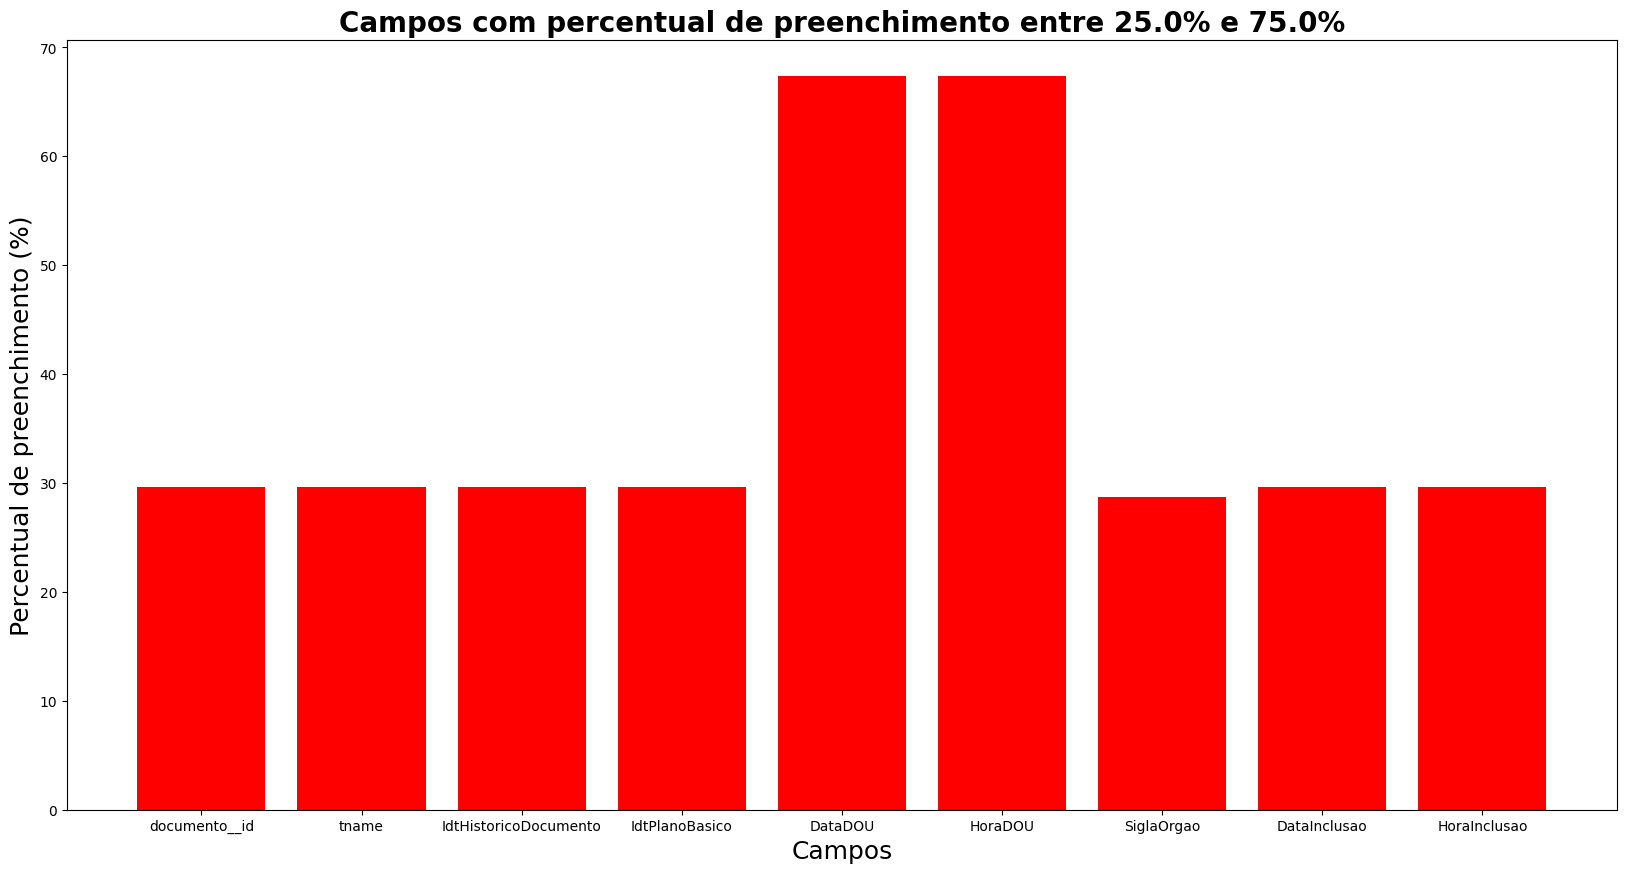

In [65]:
# Fields on threshold B
print('\nCampos no Limiar B:')
for i in range(len(filled_percentage_th_b)):
    print(f"\t{filled_percentage_th_b[i][0]} ({filled_percentage_th_b[i][1]:.2f}%)")
fig = plt.figure(figsize=(20,10))
values = list(map(lambda x : x[1], filled_percentage_th_b ))
keys = list(map(lambda x : x[0], filled_percentage_th_b ))
plt.bar( range(len(values)), values, tick_label=keys, color='r' )
plt.xlabel('Campos', fontsize = 18)
plt.ylabel('Percentual de preenchimento (%)', fontsize = 18)
plt.title(f'Campos com percentual de preenchimento entre {PERC_TH_B}% e {PERC_TH_A}%', fontsize = 20, fontweight='bold')

Por fim, os campos de **Classe C** são:


Campos no Limiar C:
	DataAlteracao (12.83%)
	HoraAlteracao (12.83%)


Text(0.5, 1.0, 'Campos com percentual de preenchimento menor que 25.0%')

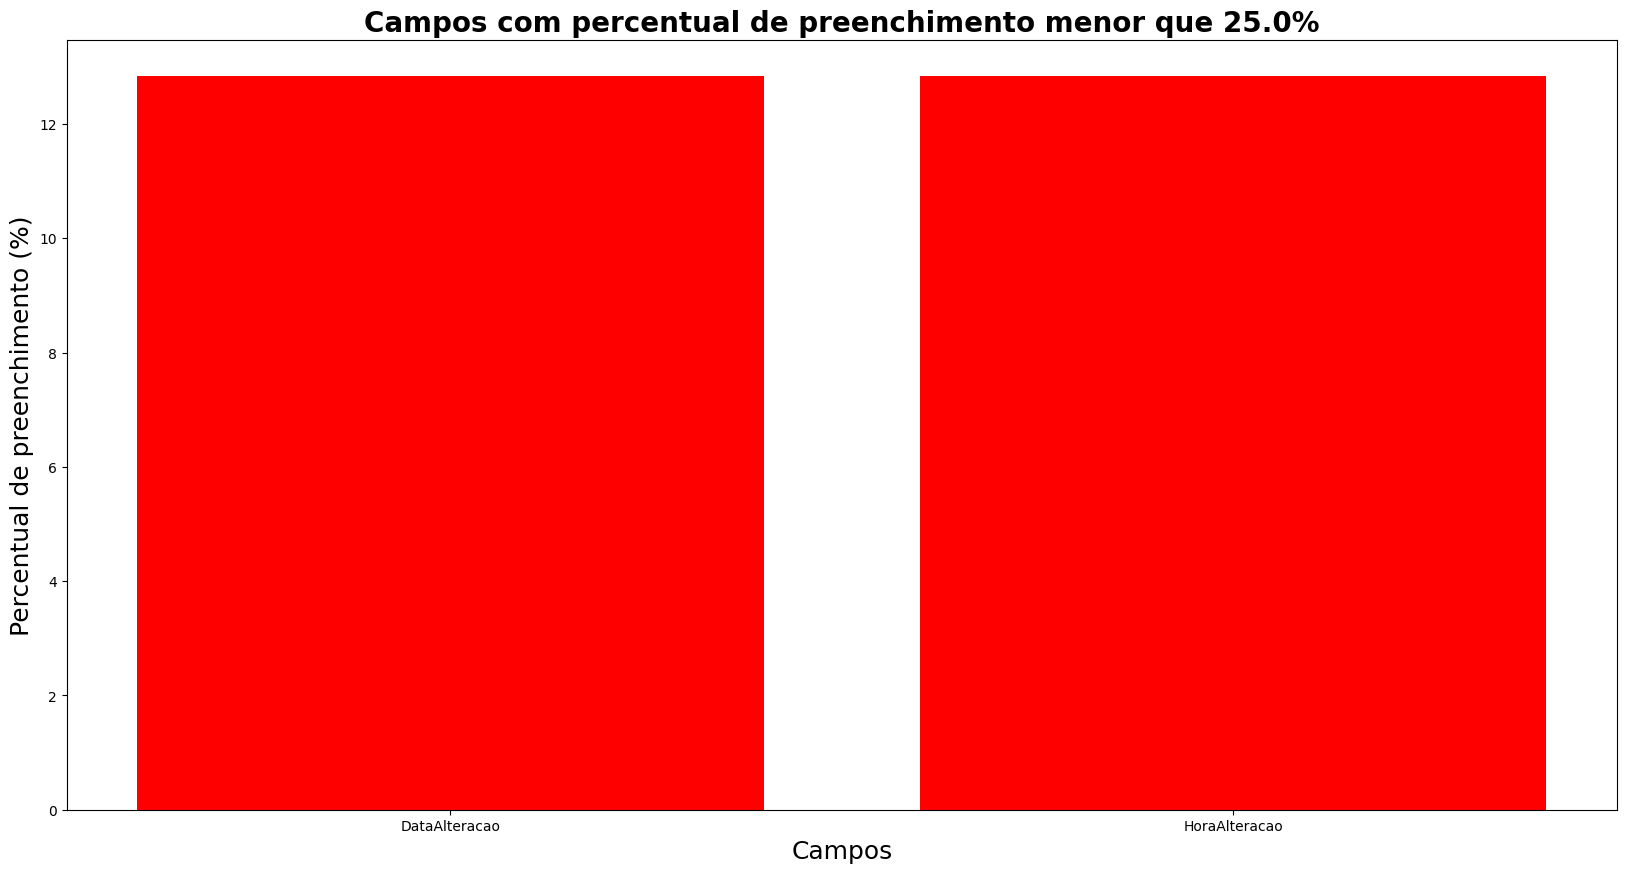

In [66]:
# Fields on threshold C
print('\nCampos no Limiar C:')
for i in range(len(filled_percentage_th_c)):
    print(f"\t{filled_percentage_th_c[i][0]} ({filled_percentage_th_c[i][1]:.2f}%)")
fig = plt.figure(figsize=(20,10))
values = list(map(lambda x : x[1], filled_percentage_th_c ))
keys = list(map(lambda x : x[0], filled_percentage_th_c ))
plt.bar( range(len(values)), values, tick_label=keys, color='r' )
plt.xlabel('Campos', fontsize = 18)
plt.ylabel('Percentual de preenchimento (%)', fontsize = 18)
plt.title(f'Campos com percentual de preenchimento menor que {PERC_TH_B}%', fontsize = 20, fontweight='bold')
